## Comparing between two particular times at the Atlantic Ocean

This example script shows how we can subtract a depth integrated field at two particular times (i.e. between 2006 and 2026). Then we can select particular region of interest (i.e. the Atlantic Ocean)

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import matplotlib
import cartopy.feature as cfeature

# set default font size
matplotlib.rcParams.update({"font.size": 8})

Plot comparing between two particular times, for example between 2006 and 2026 in June

In [2]:
# set path and file name 
path = '/gws/nopw/j04/ukesm/BGC_data/ayool/CLASS/eORCA1/SAVED/'
fn1 = 'eORCA1_MED_UKESM_y2020s_m01_ptrc_T.nc' # for January in 2020s only 
fn2 = 'eORCA1_MED_UKESM_y2090s_m01_ptrc_T.nc' # for January in 2090s only

# get data
ds06 = xr.open_dataset(path+fn1, chunks=-1) # For 2020s
ds26 = xr.open_dataset(path+fn2, chunks=-1) # For 2090s

dss=[ds06,ds26]

din=[] # Empty array for the appended the data

# subset both data so it's on the top 100m only, e.g DIN
for ds in dss:
    # Select DIN
    din3t= ds['DIN_E3T']
    # Select depth on top 100m
    d100= din3t.sel(deptht=slice(0,100))
    dint= 0.5*d100.sum('deptht').squeeze()
    # Mask the land
    dint= dint.where(dint>1e-25)
    din.append(dint)
    

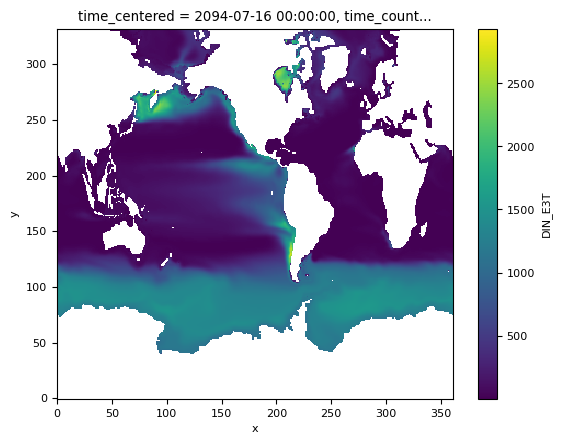

In [3]:
#See what the integrated plot looks like
dint.plot()

In [4]:
d100['deptht']

<xarray.DataArray 'deptht' (deptht: 24)>
array([ 0.50576 ,  1.555855,  2.667682,  3.85628 ,  5.140361,  6.543034,
        8.092519,  9.82275 , 11.77368 , 13.991038, 16.525322, 19.429802,
       22.757616, 26.5583  , 30.874561, 35.740204, 41.180023, 47.211895,
       53.850636, 61.11284 , 69.02168 , 77.61116 , 86.92943 , 97.04131 ],
      dtype=float32)
Coordinates:
  * deptht   (deptht) float32 0.5058 1.556 2.668 3.856 ... 77.61 86.93 97.04
Attributes:
    name:       deptht
    long_name:  Vertical T levels
    units:      m
    positive:   down
    bounds:     deptht_bounds

Now that we have subset and got the data for both years, we can subtract between 2026 and 2006

Text(0.5, 0, '(mmol DIN m$^{-3}$)')

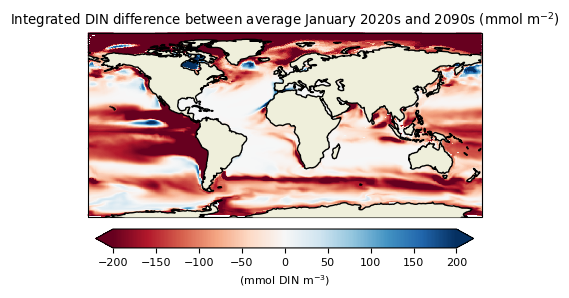

In [11]:
# Subtract between 2026 and 2006
deldin=din[1]-din[0]

# set axes
fig= plt.figure(figsize=(6.5,3.0))
plt_proj = ccrs.PlateCarree()
axs = plt.axes(projection=plt_proj)

# set colour bar limits
nmin, nmax = -200, 200
# Add Land
axs.add_feature(cfeature.LAND, zorder=100, edgecolor='k')  

# render DIN
pp=deldin.plot(ax=axs, x='nav_lon', y='nav_lat', 
                   transform=ccrs.PlateCarree(), cmap='RdBu', 
                   vmin=nmin, vmax=nmax, add_labels=False, add_colorbar=False)
axs.set_title('Integrated DIN difference between average January 2020s and 2090s (mmol m$^{-2}$)')
cb = plt.colorbar(pp, ax=axs, extend='both', orientation='horizontal', pad=0.05, shrink=0.75)
cb.ax.set_xlabel('(mmol DIN m$^{-3}$)')

Then we can select the latitude and longitude for the Atlantic ocean, then exclude everything that are beyond the latitude and longitude. See what it looks like at the end:

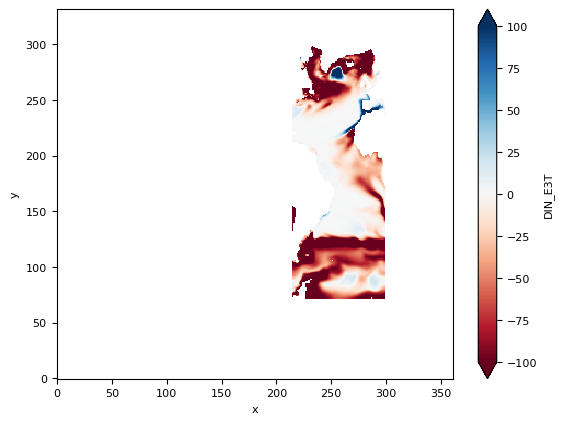

In [6]:
# Select longitude
lonmax=-73
lonmin= 12

# I set the latmax and latmin to -70/70 so it will not include the Antarctic and Arctic oceans
latmax= 70
latmin=-70

# Now we cut off the Lat and long
mask_lon=(deldin['nav_lon']>= lonmax) & (deldin['nav_lon']<=lonmin)
mask_lat=(deldin['nav_lat']<= latmax) & (deldin['nav_lat']>=latmin)
cropped=deldin.where(mask_lat & mask_lon)

# see what it looks like
cropped.plot(vmin=-100, vmax=100, cmap='RdBu')


Now we can make the plot a bit neater, by cropping the spaces that we are not interested in, by using matplotlib's 'set_extent', and adding our own colorbar

Text(0, 0.5, '(mmol DIN m$^{-2}$)')

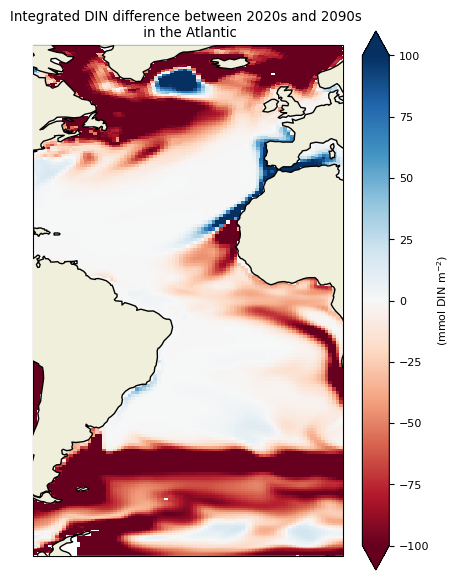

In [9]:
# Make a neater plot
nnmin, nnmax= -100, 100

fig= plt.figure(figsize=(5,7))
plt_proj = ccrs.PlateCarree()
axs = plt.axes(projection=plt_proj)

# Get rid of the white spaces
axs.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())

pp=cropped.plot(ax=axs, x='nav_lon', y='nav_lat', 
                   transform=ccrs.PlateCarree(), cmap='RdBu', 
                   vmin= nnmin, vmax= nnmax, add_labels=False, add_colorbar=False)


axs.add_feature(cfeature.LAND, zorder=100, edgecolor='k') 
axs.set_title('Integrated DIN difference between 2020s and 2090s \n in the Atlantic')
cb = plt.colorbar(pp, ax=axs, extend='both', orientation='vertical', pad=0.05)
cb.ax.set_ylabel('(mmol DIN m$^{-2}$)')